In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo

### Basic optimizer

In [2]:
def f(X):
    """Given a scalar X, return some value(a real number)"""
    Y = (X - 1.5)**2 + 0.5
    print "X = {}, Y = {}".format(X, Y)
    return Y

In [3]:
Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
print "Minimal found at: X =", min_result.x,", Y = ", min_result.fun

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minimal found at: X = [1.5] , Y =  0.5


X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


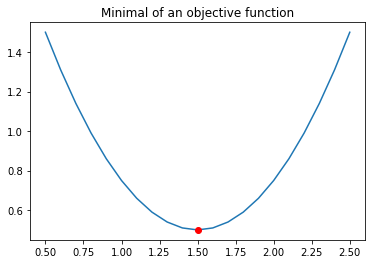

In [4]:
# Plot function and minimal point
Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)

plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minimal of an objective function")
plt.show()

### Linear Optimizer

In [5]:
def error(line, data):
    """Compute error between given line model and observed data
    Parameters
        line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
        data: 2D array where each row is a point (x, y)
    """
    return np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1]))**2)

def fit_line(data, error_func):
    """Fit a line to given data, using a supplierd error function
    Parameters:
        data: 2D array where each row is a point(X, Y)
        error func: function that computes the error between a line and observed data
    Returns line that minimizes the error function
    """
    # Generate initial guess for line model
    l = np.float32([0, np.mean(data[:, 1])]) # slope = 0, intercept = mean(y_values)

    #plot initial guess(optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0]*x_ends + l[1], 'm--', linewidth=2.0, label="Initial guess")

    # Call optimizer to minimize error function
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True})
    return result.x

Original line: C0 = 4.0, C1 = 2.0


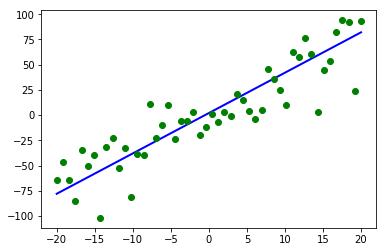

In [6]:
# define original line
l_orig = np.float32([4,2])
print "Original line: C0 = {}, C1 = {}".format(l_orig[0], l_orig[1])

Xorig = np.linspace(-20,20,50)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label="Original line")

# generate noisy datapoints
noise_sigma = 20.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label="Data points")
plt.show()

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 17928.6884297
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Fitted line: C0 = 4.18383017247, C1 = 3.22546577454


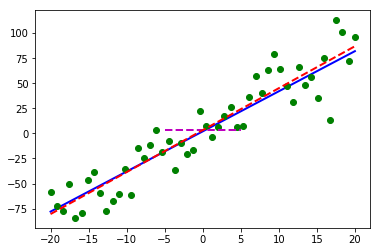

In [7]:
# define original line
l_orig = np.float32([4,2])
print "Original line: C0 = {}, C1 = {}".format(l_orig[0], l_orig[1])

Xorig = np.linspace(-20,20,50)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label="Original line")

# generate noisy datapoints
noise_sigma = 20.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label="Data points")

# Try to fit a line to this data
l_fit = fit_line(data, error)
print "Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1])
plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label="")

plt.show()

### Polynomial optimizer

In [8]:
def error_poly(C, data):
    """Compute error between given polynomial model and observed data
    Parameters
        C: numpy.poly1d object
        data: 2D array where each row is a point (x, y)
    """
    return np.sum((data[:, 1] - np.polyval(C, data[:, 0]))**2)

def fit_poly(data, error_func, degree=3):
    """Fit a line to given data, using a supplierd error function
    Parameters:
        data: 2D array where each row is a point(X, Y)
        error func: function that computes the error between a polynomial and observed data
    Returns polinomial that minimizes the error function
    """
    # Generate initial guess for polynomial model
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32)) # slope = 0, intercept = mean(y_values)

    #plot initial guess(optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label="Initial guess")
    
    # Call optimizer to minimize error function
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x)

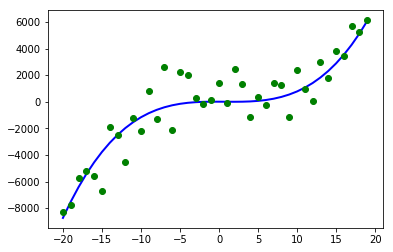

In [9]:
# define original poly
poly_orig = np.poly1d([1, -2, -3, 4])

Xorig = np.arange(-20,20)
Yorig = poly_orig(Xorig)
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label="Original poly")

# generate noisy datapoints
noise_sigma = 1500.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label="Data points")

plt.show()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 83716294.4453
            Iterations: 7
            Function evaluations: 63
            Gradient evaluations: 7


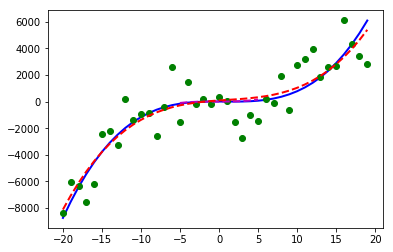

In [10]:
# define original poly
poly_orig = np.poly1d([1, -2, -3, 4])

Xorig = np.arange(-20,20)
Yorig = poly_orig(Xorig)
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label="Original poly")

# generate noisy datapoints
noise_sigma = 1500.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:,0], data[:,1], 'go', label="Data points")

# Try to fit a poly model to this data
poly_fit = fit_poly(data, error_poly)
plt.plot(data[:, 0], poly_fit(data[:, 0]), 'r--', linewidth=2.0, label="")

plt.show()